In [1]:
import pandas_datareader.data as web # accessing data from allowed remote servers yahoo,tingo
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
start = datetime.datetime(2006,1,1) # parsing data according to start and end date
end=datetime.datetime(2016,1,1)
BAC = web.DataReader("BAC",'yahoo',start,end) #providing bank name and server name

In [3]:
BAC.head() # here date is used as index and volume is total amount of traded stoks

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,33.777523
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,33.418777
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,33.461823
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,33.411594
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,33.433132


In [4]:
C = web.DataReader("C",'yahoo',start,end)#city group stock share
GS = web.DataReader("GS",'yahoo',start,end)#goldman
JPM = web.DataReader("JPM",'yahoo',start,end)#JPmorgan
MS = web.DataReader("MS",'yahoo',start,end)#morganstanley
WFC = web.DataReader("WFC",'yahoo',start,end)#wellsfargo

In [5]:
tickers =['BAC','C','GS','JPM','MS','WFC']

In [6]:
bank_stocks=pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers) # sorting the bank names column wise. for concat we are marging separate tables for same dates or index

In [7]:
bank_stocks.head() # 2006 to 2015  stock data is recieved for different banks

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  33.777523   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.418777   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  33.461823   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  33.411594   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  33.433132   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  35.558964  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  35.583355  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  35.680935  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  35.717529  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  36.095612  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.353487  
2006-01-04  31.530001  10870000.0  20.117413  
2006-01-05  31.495001  10158000.0  20.095078  
2006-01-06  31.680000   8403800.0  20.213114  
2006-01-09  31.674999   5619600.0  20.209930  

[5 rows x 36 columns]

In [8]:
bank_stocks.columns.names=['Bank Ticker','Stock Info'] # indexing 2 created column names bank ticker and stock info as we joined the tables
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.777523  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.418777  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.461823  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.411594  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.433132  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  35.558964  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  35.583355  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.680935  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.717529  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  36.095612  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.353487  
2006-01-04   31.799999  31.530001  10870000.0  20.117413  
2006-01-05   31.500000  31.495001  10158000.0  20.095078  
2006-01-06   31.580000  31.680000   8403800.0  20.213114  
2006-01-09   31.674999  31.674999   5619600.0  20.209930  

[5 rows x 36 columns]

In [9]:
bank_stocks['BAC']['Close'].max() # checking the maximum value during the closing by accing a bank and its close column

54.900001525878906

In [10]:
for tick in tickers:
    print(bank_stocks['BAC']['Close'].max())

54.900001525878906
54.900001525878906
54.900001525878906
54.900001525878906
54.900001525878906
54.900001525878906


In [11]:
for tick in tickers:
    print(bank_stocks['BAC']['Close'].max())

54.900001525878906
54.900001525878906
54.900001525878906
54.900001525878906
54.900001525878906
54.900001525878906


In [12]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max() #getting the maximum of all close cloumns for all banks

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [13]:
returns=pd.DataFrame() # storing the data frame as returns

In [14]:
# creating a new return data frame 
# setting the new column name [tick+' Return'] where tick is the bank name
#taking the close column values  and changing

for tick in tickers:
    returns[tick+' Return']=bank_stocks[tick]['Close'].pct_change()
    
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


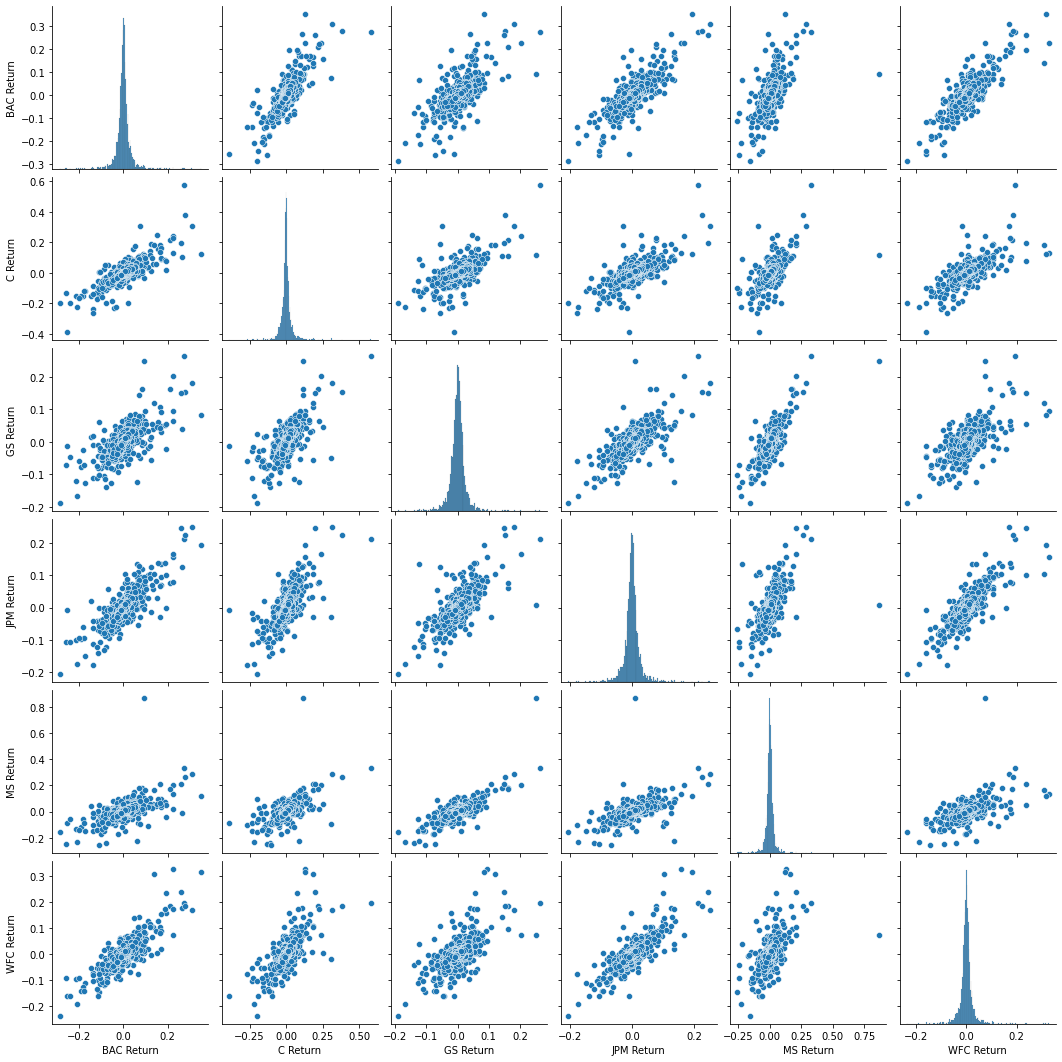

In [15]:
# null values are skipped
sns.pairplot(returns[1:])#stars from index 1, the spreaded it is the better its position and getting closer to 90 degree means stock crash

In [16]:
returns.min()#single day minimum values worst stock drops

BAC Return   -0.289694
C Return     -0.390244
GS Return    -0.189596
JPM Return   -0.207274
MS Return    -0.258929
WFC Return   -0.238223
dtype: float64

In [17]:
returns.idxmin()# date of loss

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [18]:
returns.idxmax()#dates of most gains

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [19]:
returns.std()#standard deviation

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [20]:
returns.loc['2015-01-01':'2015-12-31'].std() # checking highest to lowest risk according to date

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

/home/wasif/.local/share/virtualenvs/DataAnalysis-vANG4KVm/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS Return', ylabel='Density'>

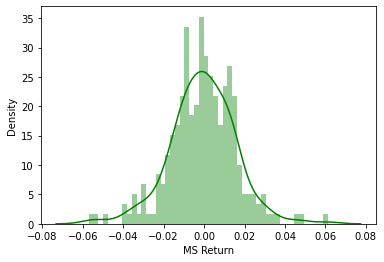

In [21]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=50)# deviation is very low, .06 from average

/home/wasif/.local/share/virtualenvs/DataAnalysis-vANG4KVm/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C Return', ylabel='Density'>

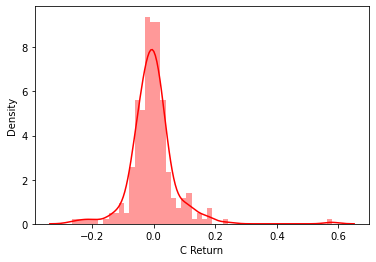

In [22]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=50)
# deviation is very high -0.2 to 0.6 the sharper it gets the more risky it becomes

In [23]:
sns.set_style('whitegrid')

In [24]:
import plotly
import cufflinks as cf
cf.go_offline()

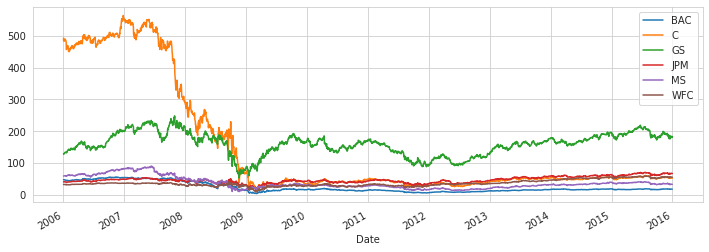

In [25]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()

<AxesSubplot:xlabel='Date'>

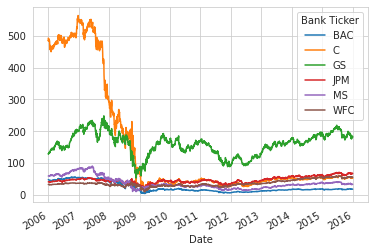

In [26]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

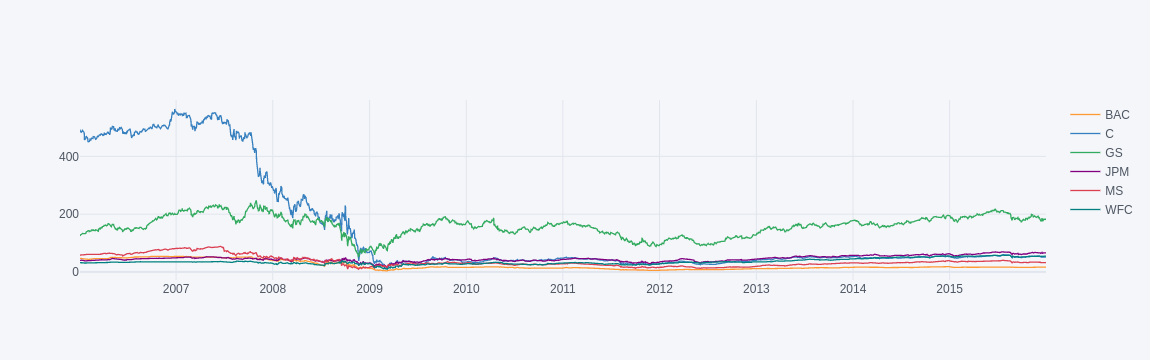

In [27]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()# explorable data plot

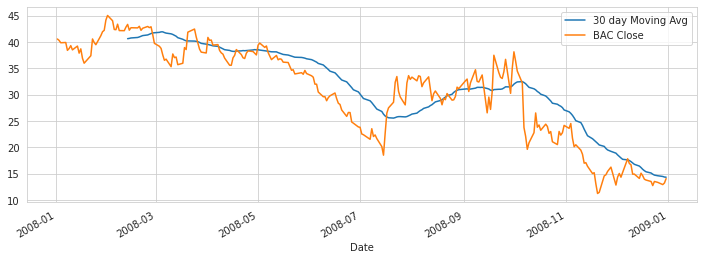

In [28]:
plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day Moving Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()

In [29]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971516,0.550898,0.103874,0.944218,0.008542
C,0.971516,1.000000,0.434123,0.003515,0.933609,-0.068536
GS,0.550898,0.434123,1.000000,0.685286,0.683792,0.499897
JPM,0.103874,0.003515,0.685286,1.000000,0.250427,0.940269
MS,0.944218,0.933609,0.683792,0.250427,1.000000,0.131835
WFC,0.008542,-0.068536,0.499897,0.940269,0.131835,1.000000


<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

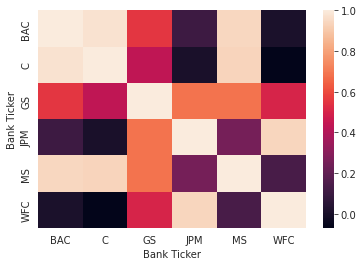

In [30]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr())

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

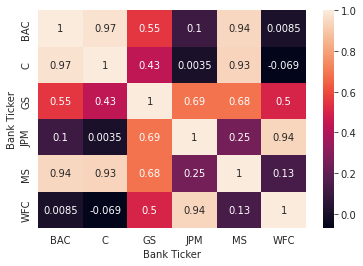

In [31]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

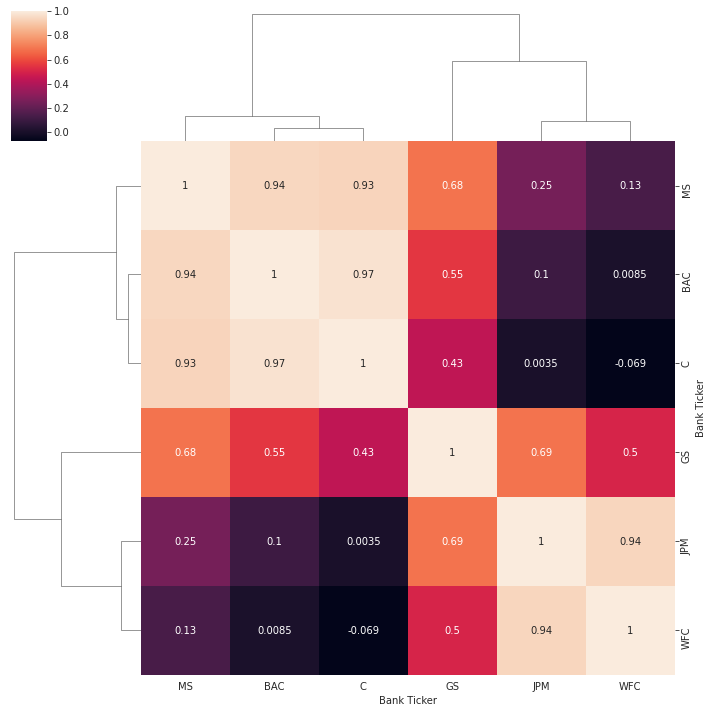

In [32]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

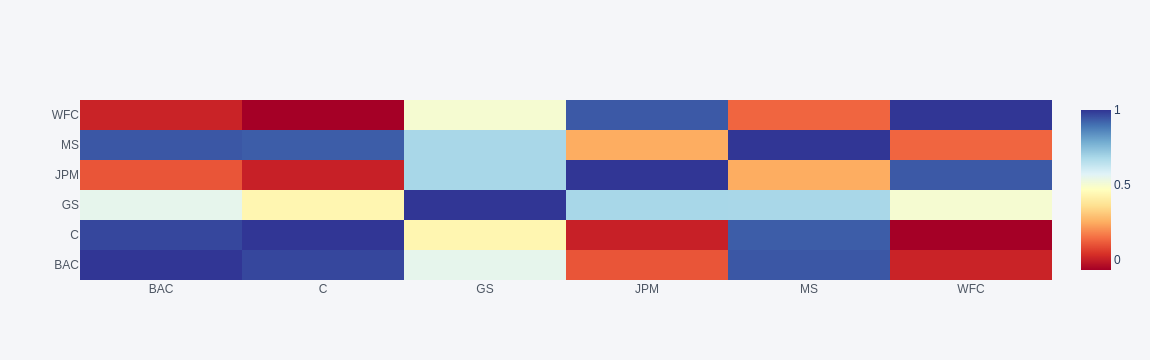

In [33]:
close_corr=bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

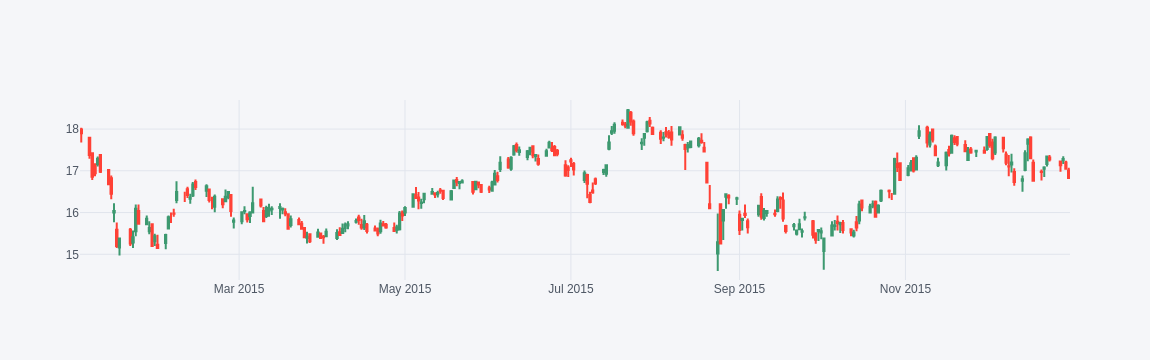

In [34]:
bac15=BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01']
bac15.iplot(kind='candle')

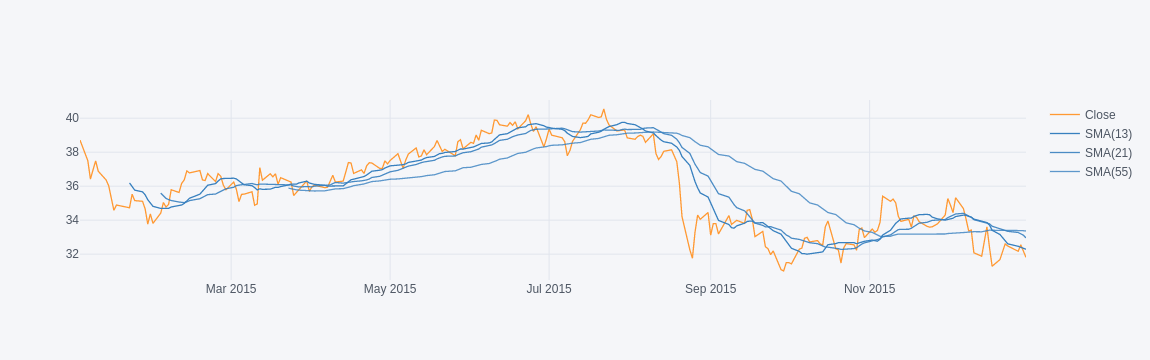

In [35]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55])

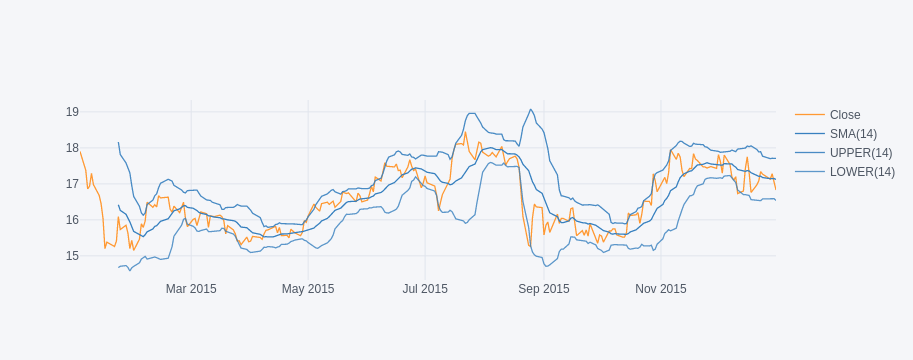

In [36]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

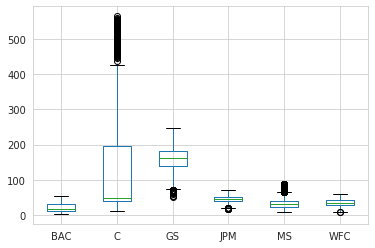

In [48]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').boxplot()
plt.savefig('../data')